{'Score_Count': [6, 4, 16, 9, 59]}
{'Score_Count': [5, 31, 10, 11, 24]}
{'Score_Count': [5, 19, 16, 12, 42]}
{'Score_Count': [19, 20, 20, 11, 20]}
{'Score_Count': [8, 1, 20, 7, 58]}


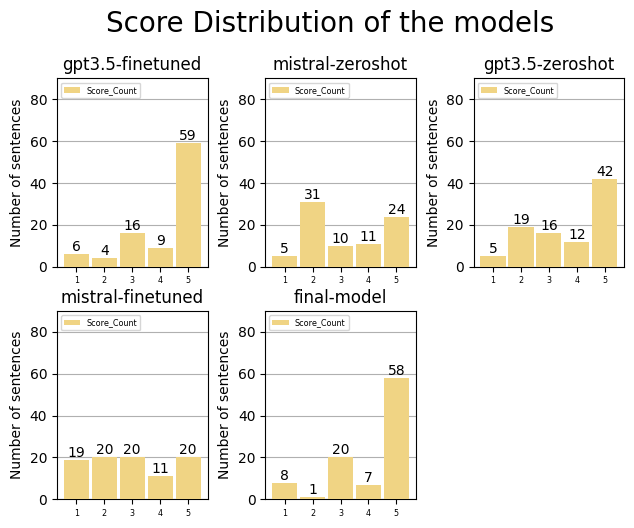

In [4]:
import pandas as pd
from matplotlib.pyplot import figure, savefig, show, subplots
import os
import math
import numpy as np
import matplotlib.pyplot as plt

#dfa = pd.read_csv("./gpt3.5-zeroshot.csv", sep=';')
#print(dfa['Original'].value_counts()['1'])

def aux(param):
    if type(param) == str:
        return int(param)
    if math.isnan(param):
        return param
    return int(param)

fig, ax = plt.subplots(2,3)
fig.tight_layout()

fig.suptitle('Score Distribution of the models', fontsize=20, y=1.1)

dic = {}
directory = "../"

i=0
j=0
for file in os.scandir(directory):
    if file.is_file():
        if "csv" in file.name:
            df = pd.read_csv(file.path, sep=';')
            file_tag=file.name[:-4]
            
            results = {'Score_Count':[]}
            score_label = [1,2,3,4,5]
            
            for score in score_label:
                results['Score_Count'].append(df['Score'].value_counts()[score])
            print(results)


            x = np.arange(len(score_label))  # the label locations
            width = 0.9  # the width of the bars
            multiplier = 0
            
            
            multiplier = 1
            for attribute, measurement in results.items():
                offset = width * multiplier
                rects = ax[i,j].bar(x, measurement, width, label=attribute, capsize=5, color = '#f0d484',zorder=3)
                ax[i,j].bar_label(rects, padding=0,fontsize=10)
                multiplier += 1
        
            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax[i,j].set_ylabel('Number of sentences')
            ax[i,j].set_title(f'{file_tag}')
            ax[i,j].set_xticks(x, score_label)
            ax[i,j].legend(loc='upper left', ncols=1,fontsize='xx-small')
            ax[i,j].set_ylim(0, 90)
            ax[i,j].tick_params(axis="x", labelrotation=0, labelsize="xx-small")
            ax[i,j].grid(zorder=0, axis='y')
            
            if j==2:
                i+=1
                j=0
            else:
                j+=1

fig.delaxes(ax[1][2])

savefig(f"/home/eduvedras/tese/model/thesisplots/distributions.png", bbox_inches='tight')
show()
